In [1]:
from sklearn.datasets import load_boston

In [2]:
X,y = load_boston(return_X_y=True)

In [3]:
from sklearn.neighbors import KNeighborsRegressor

In [4]:
mod = KNeighborsRegressor()

In [5]:
mod.fit(X, y)

KNeighborsRegressor()

In [6]:
y_1 = mod.predict(X)

In [7]:
from sklearn.linear_model import LinearRegression # Trying another model

In [8]:
mod_1 = LinearRegression()

In [9]:
mod_1.fit(X,y)

LinearRegression()

In [10]:
y_2 =mod_1.predict(X)

In [11]:
import matplotlib.pylab as plt

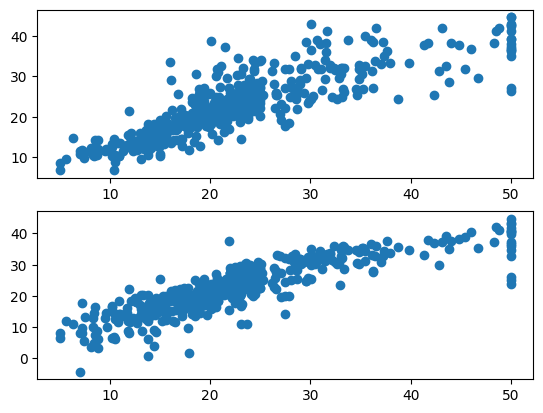

In [12]:
fig, axs =plt.subplots(2)
fig.suptitle="Comparism - K nearest & Linear Model"
axs[0].scatter(y,y_1)
axs[1].scatter(y,y_2)

##When you want to add a preprocessing to the model itself for better results, You can use pipelines

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [14]:
pipe_K = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=2))
])
mod_2 = pipe_K.fit(X,y)
# mod_2.get_params() to get the tweakable settings in a pipeline

In [15]:
y_3 = mod_2.predict(X)

In [16]:
pipe_L = Pipeline([
    ("scale", StandardScaler()),
    ("model", LinearRegression())
])
mod_3 = pipe_L.fit(X,y)

In [17]:
y_4 = pipe_L.predict(X)

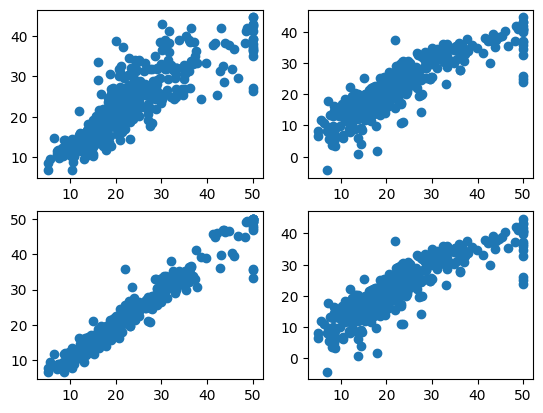

In [18]:
fig, axs =plt.subplots(2,2)
fig.suptitle="Comparism - K nearest & Linear Model"
axs[0,0].scatter(y,y_1)
axs[0,1].scatter(y,y_2)
axs[1,0].scatter(y,y_3)
axs[1,1].scatter(y,y_4)

In [19]:
from sklearn.model_selection import GridSearchCV

In [21]:
mod_grid = GridSearchCV(estimator =pipe_K, param_grid={'model__n_neighbors':[1,2,3,4,5,6,7,8,9,10]}, cv=5) # cv is the cross validation,
## the number of sections that the data will be brroken into while shuffling

In [22]:
mod_grid.fit(X,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model',
                                        KNeighborsRegressor(n_neighbors=2))]),
             param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [23]:
import pandas as pd

In [25]:
pd.DataFrame(mod_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000000,0.000000,0.003127,0.006253,1,{'model__n_neighbors': 1},0.339313,0.423779,0.534566,0.486373,-1.623928,0.032020,0.830549,10
1,0.000000,0.000000,0.006249,0.007653,2,{'model__n_neighbors': 2},0.441649,0.547962,0.474980,0.496794,-0.548699,0.282537,0.417052,9
2,0.003125,0.006250,0.001511,0.003021,3,{'model__n_neighbors': 3},0.520304,0.593339,0.547746,0.513891,0.002980,0.435652,0.218139,8
3,0.000000,0.000000,0.000000,0.000000,4,{'model__n_neighbors': 4},0.547088,0.606925,0.509770,0.490452,0.211278,0.473103,0.136807,7
4,0.000000,0.000000,0.003137,0.006274,5,{'model__n_neighbors': 5},0.560895,0.619174,0.486619,0.469869,0.231330,0.473577,0.132431,6
5,0.003129,0.006258,0.000000,0.000000,6,{'model__n_neighbors': 6},0.582450,0.621194,0.509111,0.446859,0.250417,0.482006,0.130434,5
6,0.003121,0.006242,0.000000,0.000000,7,{'model__n_neighbors': 7},0.602434,0.636185,0.516102,0.442088,0.245749,0.488512,0.139022,4
7,0.000000,0.000000,0.003125,0.006250,8,{'model__n_neighbors': 8},0.615090,0.631185,0.551340,0.440117,0.239072,0.495361,0.144674,3
8,0.005840,0.007182,0.000000,0.000000,9,{'model__n_neighbors': 9},0.625314,0.630621,0.564464,0.429107,0.279376,0.505776,0.134503,1
9,0.000000,0.000000,0.003143,0.006285,10,{'model__n_neighbors': 10},0.614446,0.652489,0.555555,0.420648,0.261128,0.500853,0.143381,2


Perform analysis on this result to choose the right tweek for the model